In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filename = '../load-tests/results/serverless_v3_stats_history.csv'
df = pd.read_csv(filename)

# Convert linux timestamp to minutes
df.Timestamp = (df.Timestamp - df.Timestamp[0]) / 60 / 60

# Cut out non-existent RPSes, glitch caused by locust
df = df[df.Timestamp <= 6.0]
df


,Timestamp,User Count,Type,Name,Requests/s,Failures/s,50%,66%,75%,80%,...,99.9%,99.99%,100%,Total Request Count,Total Failure Count,Total Median Response Time,Total Average Response Time,Total Min Response Time,Total Max Response Time,Total Average Content Size
0,0.000000,0,NaN,Aggregated,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0.000000,0,0,0.000000e+00
1,0.000278,0,NaN,Aggregated,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0.000000,0,0,0.000000e+00
2,0.000556,0,NaN,Aggregated,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0.000000,0,0,0.000000e+00
3,0.000833,0,NaN,Aggregated,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0.000000,0,0,0.000000e+00
4,0.001111,0,NaN,Aggregated,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0.000000,0,0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176027,5.302500,15,POST,/photos,0.1,0.0,15000.0,15000.0,15000.0,15000.0,...,15000.0,15000.0,15000.0,818,0,130,753.061125,57,33978,1.480037e+03
176028,5.302500,15,GET,/photos/{all},0.2,0.0,230.0,230.0,230.0,230.0,...,230.0,230.0,230.0,15917,22,170,313.564428,0,23485,2.916046e+04
176029,5.302500,15,GET,/photos?modelSlug=,0.5,0.0,250.0,250.0,250.0,250.0,...,250.0,250.0,250.0,3505,3,160,292.182596,0,9214,1.237976e+04
176030,5.302500,15,PUT,/upload-photo,0.1,0.0,610.0,610.0,610.0,610.0,...,610.0,610.0,610.0,818,2,600,1002.249389,56,22330,0.000000e+00


<AxesSubplot: xlabel='Czas od rozpoczęcia [h]', ylabel='Liczba użytkowników'>

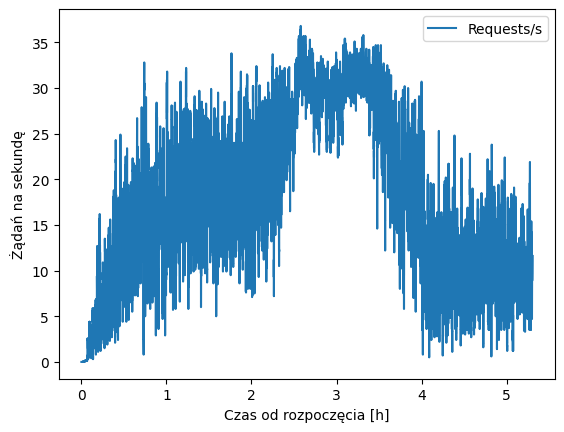

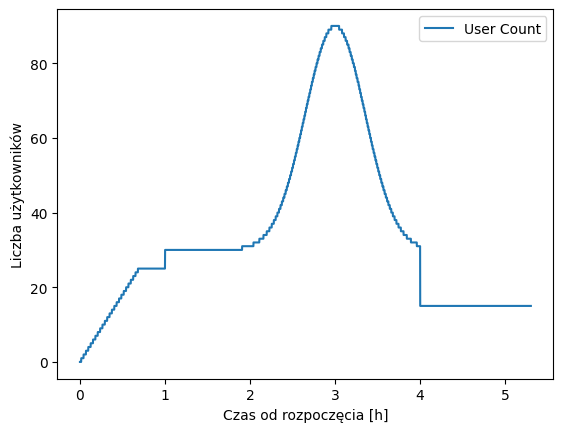

In [3]:
df[df.Name == 'Aggregated'].plot(x = 'Timestamp', y = 'Requests/s', xlabel='Czas od rozpoczęcia [h]', ylabel='Żądań na sekundę')
df[df.Name == 'Aggregated'].plot(x = 'Timestamp', y = 'User Count', xlabel='Czas od rozpoczęcia [h]', ylabel='Liczba użytkowników')

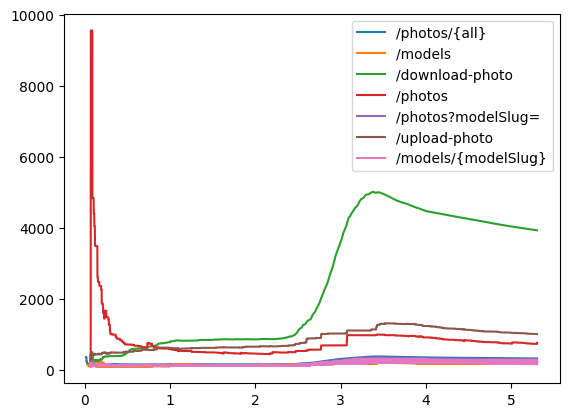

In [4]:
for name in df['Name'].unique():
    if name == 'Aggregated':
        continue
    new_df = df[df['Name'] == name]
    plt.plot(new_df['Timestamp'], new_df['Total Average Response Time'], label=name)
plt.legend()
plt.show()
